
Importing essential packages



In [2]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)

import torch
import torchvision
import torchvision.transforms as transforms
import time # this line is added to import time package

In [4]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



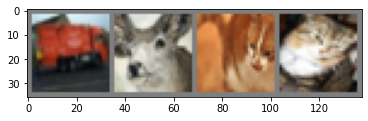

truck  deer   cat   cat


In [5]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

2. Define a Convolutional Neural Network



In [6]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [7]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [8]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)
# Some code is also added to calculate the start and stop time of training. Comments are added for the same.

start_time1 = time.time() # this line is added to store the start time using time function

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

stop_time1 = time.time() # this line is added to capture the stop time using time function
training_time1 = stop_time1 - start_time1 # this line is added to calculate the training time

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss: 2.235
[1,  4000] loss: 1.850
[1,  6000] loss: 1.662
[1,  8000] loss: 1.575
[1, 10000] loss: 1.485
[1, 12000] loss: 1.458
[2,  2000] loss: 1.371
[2,  4000] loss: 1.323
[2,  6000] loss: 1.325
[2,  8000] loss: 1.291
[2, 10000] loss: 1.294
[2, 12000] loss: 1.251
Finished Training


Let's quickly save our trained model:



In [9]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

See `here <https://pytorch.org/docs/stable/notes/serialization.html>`_
for more details on saving PyTorch models.

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



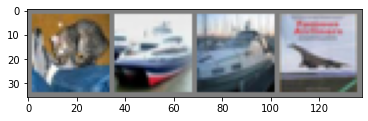

GroundTruth:    cat  ship  ship plane


In [10]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Next, let's load back in our saved model (note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so):



In [11]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Okay, now let us see what the neural network thinks these examples above are:



In [12]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)

outputs = net(images)

The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [13]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4))) 

Predicted:   frog  ship   car  ship


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [14]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)
# A line is added to store the accuracy. Comment is added for the same in front of it.
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network 
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
first_accuracy = int(100 * correct / total) # this line is added to store the accuracy in first_accuracy

Accuracy of the network on the 10000 test images: 56 %


That looks way better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



Accuracy for class plane is: 48.2 %
Accuracy for class car   is: 72.6 %
Accuracy for class bird  is: 44.2 %
Accuracy for class cat   is: 20.7 %
Accuracy for class deer  is: 53.4 %
Accuracy for class dog   is: 53.9 %
Accuracy for class frog  is: 78.8 %
Accuracy for class horse is: 54.7 %
Accuracy for class ship  is: 71.4 %
Accuracy for class truck is: 65.0 %


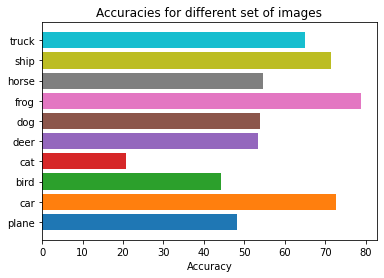

In [15]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)
# Some lines are added to plot the histogram. Comments are added for the same in front of it
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data    
        outputs = net(images)    
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

  
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, 
                                                   accuracy))
    plt.title('Accuracies for different set of images') # this line is added to provide the title to the histogram
    plt.xlabel("Accuracy") # this line is added to provide label to the x-axis of histogram 
    plt.barh(classname, accuracy) # this line is added to plot the histogram with classname and accuracy

<BarContainer object of 1 artists>

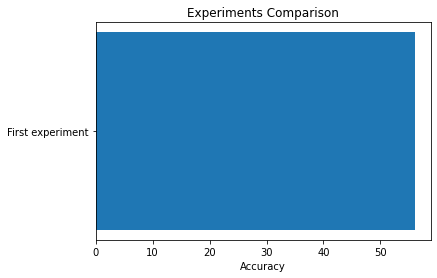

In [16]:
# Some code of lines are added to the plot the histogram for showing the one experiment
# Comments are added for the same in front of it

x = ["First experiment"]   # this line is added to give the title to the x-axis of the histogram  
y = first_accuracy # this line is added to store the first accuracy in y
plt.title('Experiments Comparison') # this line is added to give the title to the histogram
plt.xlabel("Accuracy") # this line is added to give the label to the x-axis 
plt.barh(x, y) # this line is added to plot the histogram with x and y values


[1,  2000] loss: 2.157
[1,  4000] loss: 1.753
[1,  6000] loss: 1.639
[1,  8000] loss: 1.562
[1, 10000] loss: 1.516
[1, 12000] loss: 1.455
[2,  2000] loss: 1.385
[2,  4000] loss: 1.363
[2,  6000] loss: 1.331
[2,  8000] loss: 1.305
[2, 10000] loss: 1.317
[2, 12000] loss: 1.278
[3,  2000] loss: 1.202
[3,  4000] loss: 1.210
[3,  6000] loss: 1.204
[3,  8000] loss: 1.195
[3, 10000] loss: 1.175
[3, 12000] loss: 1.190
[4,  2000] loss: 1.119
[4,  4000] loss: 1.116
[4,  6000] loss: 1.095
[4,  8000] loss: 1.120
[4, 10000] loss: 1.095
[4, 12000] loss: 1.104
[5,  2000] loss: 1.023
[5,  4000] loss: 1.037
[5,  6000] loss: 1.046
[5,  8000] loss: 1.050
[5, 10000] loss: 1.068
[5, 12000] loss: 1.054
[6,  2000] loss: 0.960
[6,  4000] loss: 0.967
[6,  6000] loss: 1.012
[6,  8000] loss: 1.006
[6, 10000] loss: 0.985
[6, 12000] loss: 1.000
[7,  2000] loss: 0.912
[7,  4000] loss: 0.931
[7,  6000] loss: 0.946
[7,  8000] loss: 0.972
[7, 10000] loss: 0.953
[7, 12000] loss: 0.954
[8,  2000] loss: 0.856
[8,  4000] 

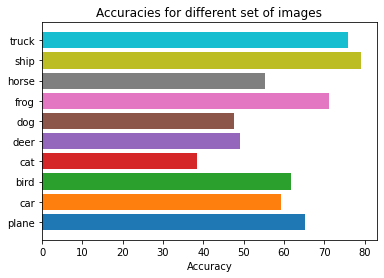

In [17]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)
# The code in this cell has been modified. In this code epoch time has been increased from 2 to 10
# Some lines are added to plot the histogram. Comments are added for the same in front of them

# Experiment 2
# With 2 convolution layers and epoch 10
start_time2 = time.time() # this line is added to store start time using time function
import torch.nn as nn
import torch.nn.functional as F


class Net1(nn.Module):            # this line is modified with net name
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net1 = Net1()   # this line is modified with the net name


import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net1.parameters(), lr=0.001, momentum=0.9)  # this line is modified with net name


for epoch in range(10):  # epoch is changed to 10

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net1(inputs)    # this line is modified with net name
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
stop_time2 = time.time() # this line is added to store the stop time using time function
training_time2 = stop_time2 - start_time2 # this line is added to calculate the training time


correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network 
        outputs = net1(images)  # this line is modified with net name
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
second_accuracy = int(100 * correct / total) # this line is added to store the accuracy



# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data    
        outputs = net1(images)    # this line is modified with the net name
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

  
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, 
                                                   accuracy))
    plt.title('Accuracies for different set of images') # this line is added to give the title to the histogram 
    plt.xlabel("Accuracy") # this line is added to give the label to x-axis of histogram
    plt.barh(classname, accuracy) # this line is added to plot the histogram with the given classname and accuracy

<BarContainer object of 2 artists>

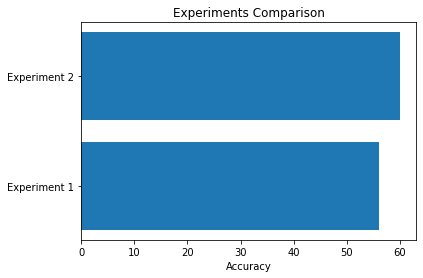

In [18]:
# This cell has the code to plot the histogram for comparison between experiments

x = ["Experiment 1", "Experiment 2"]   # this line is added to store experiments to x 
y = [first_accuracy, second_accuracy] # this line is added to store accuracies to y
plt.title('Experiments Comparison') # this line is added to give the title to histogram
plt.xlabel("Accuracy") # this line is added to give the label to x axis of histogram
plt.barh(x, y) # this line is added to plot the histogram with x and y values

[1,  2000] loss: 2.179
[1,  4000] loss: 1.875
[1,  6000] loss: 1.697
[1,  8000] loss: 1.588
[1, 10000] loss: 1.526
[1, 12000] loss: 1.478
[2,  2000] loss: 1.415
[2,  4000] loss: 1.396
[2,  6000] loss: 1.361
[2,  8000] loss: 1.354
[2, 10000] loss: 1.317
[2, 12000] loss: 1.287
Finished Training
Accuracy of the network on the 10000 test images: 53 %
Accuracy for class plane is: 61.6 %
Accuracy for class car   is: 64.5 %
Accuracy for class bird  is: 28.8 %
Accuracy for class cat   is: 36.4 %
Accuracy for class deer  is: 52.5 %
Accuracy for class dog   is: 35.1 %
Accuracy for class frog  is: 79.7 %
Accuracy for class horse is: 52.6 %
Accuracy for class ship  is: 75.0 %
Accuracy for class truck is: 51.3 %


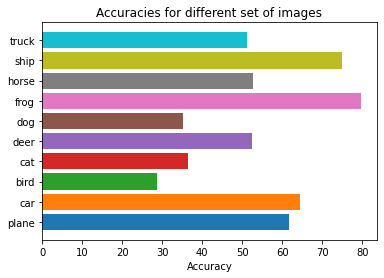

In [19]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)
# The code in this cell has been modified. In this code two new convolution layers are added
# Some lines are added to plot the histogram. Comments are added for the same in front of it

# Experiment 3
# With four convolution layers
start_time3 = time.time() # start time that captures starting time using time function
import torch.nn as nn
import torch.nn.functional as F


class Net2(nn.Module):  # this line is modified with net name
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 30, 5) # this line is added with the 3rd convolution layer
        self.conv4 = nn.Conv2d(30, 60, 5) # this line is added with the 4th convolution layer
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net2 = Net2() # This line is modified by net name


import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)  # this line is modified by net name


for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)  # this line is modified by net name
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
stop_time3 = time.time() # this line is added to calculate the stop time after training
training_time3 = stop_time3 - start_time3 # this line is added to calculate to training time


correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network 
        outputs = net2(images)  # this line is modified with the net name
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
third_accuracy = int(100 * correct / total) # this line is added to calculate the accuracy


# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data    
        outputs = net2(images)    # this line is modified with the net name
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

  
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, 
                                                   accuracy))
    plt.title('Accuracies for different set of images') # this line is added to add the title to the plot
    plt.xlabel("Accuracy") # this line is added to add the label to x-axis of the plot
    plt.barh(classname, accuracy) # this line is added to plot the histogram

<BarContainer object of 3 artists>

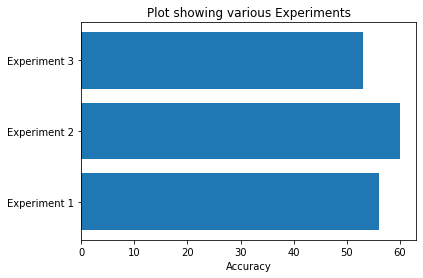

In [20]:
# This cell has code to plot the histogram

x = ["Experiment 1", "Experiment 2", "Experiment 3"]   # x which consists of multiple experiments 
y = [first_accuracy, second_accuracy, third_accuracy] # y which consists of multiple accuracies
plt.title('Plot showing various Experiments') # this line provides title to the histogram
plt.xlabel("Accuracy") # this line is added to provide label to the x-axis
plt.barh(x, y) # this line is added to plot the histogram with x and y values

[1,  2000] loss: 2.219
[1,  4000] loss: 1.959
[1,  6000] loss: 1.734
[1,  8000] loss: 1.636
[1, 10000] loss: 1.527
[1, 12000] loss: 1.494
[2,  2000] loss: 1.403
[2,  4000] loss: 1.379
[2,  6000] loss: 1.349
[2,  8000] loss: 1.337
[2, 10000] loss: 1.318
[2, 12000] loss: 1.275
Finished Training
Accuracy of the network on the 10000 test images: 54 %
Accuracy for class plane is: 66.3 %
Accuracy for class car   is: 63.3 %
Accuracy for class bird  is: 51.3 %
Accuracy for class cat   is: 18.5 %
Accuracy for class deer  is: 37.7 %
Accuracy for class dog   is: 29.6 %
Accuracy for class frog  is: 75.9 %
Accuracy for class horse is: 69.4 %
Accuracy for class ship  is: 65.7 %
Accuracy for class truck is: 69.2 %


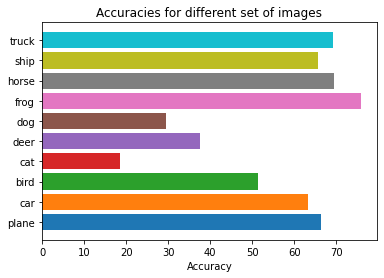

In [21]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)
# The code in this cell has been modified. In this code 8 new convolution layers are added.
# Some line are added to plot the histogram. Comments are added for the same in front of them.

# Experiment 4
# With 10 convolution layers
start_time4 = time.time() # this line is added to store start time using time function
import torch.nn as nn
import torch.nn.functional as F


class Net3(nn.Module):  # this line has modified net name
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 30, 5)     # this line is added with the 3rd convolution layer
        self.conv4 = nn.Conv2d(30, 60, 5)     # this line is added with the 4th convolution layer
        self.conv5 = nn.Conv2d(60, 80, 5)     # this line is added with the 5th convolution layer
        self.conv6 = nn.Conv2d(80, 100, 5)    # this line is added with the 6th convolution layer
        self.conv7 = nn.Conv2d(100, 120, 5)   # this line is added with the 7th convolution layer
        self.conv8 = nn.Conv2d(120, 140, 5)   # this line is added with the 8th convolution layer
        self.conv9 = nn.Conv2d(140, 160, 5)   # this line is added with the 9th convolution layer
        self.conv10 = nn.Conv2d(160, 180, 5)  # this line is added with the 10th convolution layer
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net3 = Net3()  # this line is modified with the net name


import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net3.parameters(), lr=0.001, momentum=0.9)  # this line is modified by net name


for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net3(inputs)  # this line is modified with the net name
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
stop_time4 = time.time() # this line is added to store the stop time using the time function
training_time4 = stop_time4 - start_time4 # this line is added to calculate the training time


correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network 
        outputs = net3(images)  # this line is modified with the net name
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
fourth_accuracy = int(100 * correct / total) # this line is added to store the accuracy


# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data    
        outputs = net3(images)    # this line is modified with the net name
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

  
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, 
                                                   accuracy))
    plt.title('Accuracies for different set of images') # this line is added to provide the title to histogram
    plt.xlabel("Accuracy") # this line is added to provide the label to x-axis
    plt.barh(classname, accuracy) # this line is added to plot the histogram

[1,  2000] loss: 2.086
[1,  4000] loss: 1.702
[1,  6000] loss: 1.539
[1,  8000] loss: 1.456
[1, 10000] loss: 1.397
[1, 12000] loss: 1.343
[2,  2000] loss: 1.264
[2,  4000] loss: 1.216
[2,  6000] loss: 1.210
[2,  8000] loss: 1.175
[2, 10000] loss: 1.153
[2, 12000] loss: 1.119
[3,  2000] loss: 1.047
[3,  4000] loss: 1.024
[3,  6000] loss: 1.045
[3,  8000] loss: 1.034
[3, 10000] loss: 1.021
[3, 12000] loss: 1.002
[4,  2000] loss: 0.926
[4,  4000] loss: 0.934
[4,  6000] loss: 0.953
[4,  8000] loss: 0.946
[4, 10000] loss: 0.933
[4, 12000] loss: 0.909
[5,  2000] loss: 0.857
[5,  4000] loss: 0.851
[5,  6000] loss: 0.862
[5,  8000] loss: 0.898
[5, 10000] loss: 0.869
[5, 12000] loss: 0.855
[6,  2000] loss: 0.778
[6,  4000] loss: 0.808
[6,  6000] loss: 0.802
[6,  8000] loss: 0.823
[6, 10000] loss: 0.840
[6, 12000] loss: 0.823
[7,  2000] loss: 0.731
[7,  4000] loss: 0.744
[7,  6000] loss: 0.769
[7,  8000] loss: 0.777
[7, 10000] loss: 0.765
[7, 12000] loss: 0.777
[8,  2000] loss: 0.694
[8,  4000] 

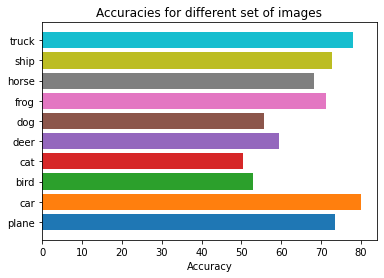

In [22]:
# The code in this cell has been used from the link provided in the google doc of pytorch.org(https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)
# Some lines are updated and some are added to plot the histogram. Comments are provided in front of them.

# Experiment 5
# With 100 output layers and 50 epochs
start_time5 = time.time() # this line is added to store start time using time function
import torch.nn as nn
import torch.nn.functional as F


class Net4(nn.Module):  # this line is modified with the net name
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 100, 5)     # this line is modified where the width is changed to 100
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(100, 16, 5)    # this line is modified where the input is changed to 100
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) 
        x = self.pool(F.relu(self.conv2(x))) 
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x)) 
        x = self.fc3(x)
        return x


net4 = Net4() # this line is modified with the net name


import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net4.parameters(), lr=0.001, momentum=0.9) # this line is modified with the net name


for epoch in range(50):  # this line is modified with the epoch value to 50

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net4(inputs) # this line is modified with the net name
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
stop_time5 = time.time() # this line is added to store the stop time using time function
training_time5 = stop_time5 - start_time5  # this line is added to calculate the training time


correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network 
        outputs = net4(images)  # this line is modified by the net name
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
fifth_accuracy = int(100 * correct / total) # this line is added to store accuracy


# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data    
        outputs = net4(images)   # this line is modified by the net name   
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

  
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, 
                                                   accuracy))
    plt.title('Accuracies for different set of images') # this line added to provide the title to histogram
    plt.xlabel("Accuracy") # this line is added to provide the label to histogram
    plt.barh(classname, accuracy) # this line is added to plot the histogram

<BarContainer object of 5 artists>

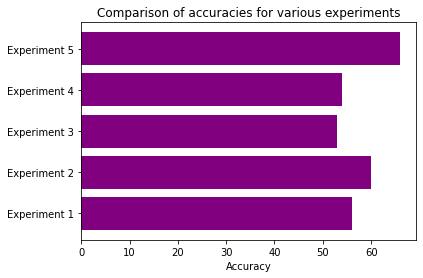

In [23]:
# The code in this cell is added to plot the histogram for the comparison of accuracies for various experiments
# Comparison of accuracies for various experiments 
x = ["Experiment 1", "Experiment 2", "Experiment 3", "Experiment 4", "Experiment 5"]   # this line is added to store different experiments in x 
y = [first_accuracy, second_accuracy, third_accuracy, fourth_accuracy, fifth_accuracy] # this line is added to store different accuracies in y
plt.title('Comparison of accuracies for various experiments') # this line is added to provide the title to the histogram
plt.xlabel("Accuracy") # this line is added to provide label to the histogram
plt.barh(x, y, color = "purple") # this line is added to plot the histogram

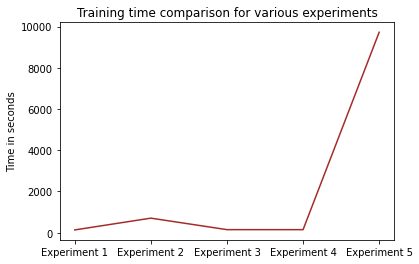

In [30]:
# The code in this cell is added to plot the histogram for the comparison of training time for various experiments

#Training Time Comparison
x = ["Experiment 1", "Experiment 2", "Experiment 3", "Experiment 4", "Experiment 5"] # this line is added to store different experiments in x 
y = [training_time1, training_time2, training_time3, training_time4, training_time5] # this line is added to store different training times in y
plt.title('Training time comparison for various experiments') # this line is added to provide the title to the histogram
plt.ylabel("Time in seconds") # this line is added to provide label to the histogram
plt.plot(x,y, color = "brown") # this line is added to plot the histogram